# Lab - working with online data 

### Milena Nichenzon

In this Lab , you will load , clean and store online flights data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import matplotlib.patches as mpat

In [2]:
import requests
import json


# Load the data

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
df = pd.DataFrame(res['result']['records'])

In [6]:
df_backup = pd.DataFrame(res['result']['records'])

## display the first rows 

In [7]:
df.head()

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,A4,551,AZIMUTH AIRLINES,2023-06-24T13:10:00,2023-06-24T13:32:00,A,MRV,MINERALNYE VODY,מינראל וודי,MINERALNYE VODY,רוסיה,RUSSIAN FEDERATION,3,None,None,LANDED,נחתה
1,2,AC,083,AIR CANADA,2023-06-24T12:45:00,2023-06-24T13:33:00,D,YUL,MONTREAL - DORVAL,מונטריאול,MONTREAL,קנדה,CANADA,3,21-26,A,DEPARTED,המריאה
2,3,CY,110,CYPRUS AIRWAYS,2023-06-24T13:10:00,2023-06-24T13:34:00,A,LCA,LARNACA,לרנקה,LARNACA,קפריסין,CYPRUS,3,None,None,LANDED,נחתה
3,4,PC,792,PEGASUS AIRLINES,2023-06-24T10:55:00,2023-06-24T13:36:00,D,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,1,315-320,A,DEPARTED,המריאה
4,5,W6,2326,WIZZAIR,2023-06-24T10:45:00,2023-06-24T13:36:00,D,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,1,301-309,A,DEPARTED,המריאה


### display the last 10 rows - What's wrong? 

In [8]:
df.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2915,2916,H4,235,HISKY EUROPE SRL,2023-06-28T13:20:00,2023-06-28T13:20:00,A,OTP,BUCHAREST - OTOPENI,בוקרשט,BUCHAREST,רומניה,ROMANIA,3,None,None,NOT FINAL,לא סופי
2916,2917,LY,574,EL AL ISRAEL AIRLINES,2023-06-28T13:20:00,2023-06-28T13:20:00,A,OTP,BUCHAREST - OTOPENI,בוקרשט,BUCHAREST,רומניה,ROMANIA,3,None,None,NOT FINAL,לא סופי
2917,2918,XC,416,CORONDON AIRLINES,2023-06-28T13:20:00,2023-06-28T13:20:00,D,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,3,None,None,ON TIME,בזמן
2918,2919,XR,814,CORENDON EUROPE,2023-06-28T13:20:00,2023-06-28T13:20:00,D,HER,HERAKLION,הרקליון,HERAKLION,יוון,GREECE,3,None,None,ON TIME,בזמן
2919,2920,6H,047,ISRAIR AIRLINES,2023-06-28T13:20:00,2023-06-28T13:20:00,D,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,None,None,ON TIME,בזמן
2920,2921,EK,2364,EMIRATES,2023-06-28T13:25:00,2023-06-28T13:25:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,None,None,ON TIME,בזמן
2921,2922,FZ,1210,FLYDUBAI,2023-06-28T13:25:00,2023-06-28T13:25:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,None,None,ON TIME,בזמן
2922,2923,HM,6425,AIR SEYCHELLES,2023-06-28T13:30:00,2023-06-28T13:30:00,A,IST,ISTANBUL,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,None,None,NOT FINAL,לא סופי
2923,2924,LY,327,EL AL ISRAEL AIRLINES,2023-06-28T13:30:00,2023-06-28T13:30:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,None,None,ON TIME,בזמן
2924,2925,TK,794,TURKISH AIRLINES,2023-06-28T13:30:00,2023-06-28T13:30:00,A,IST,ISTANBUL,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,None,None,NOT FINAL,לא סופי


In [9]:
## answer : the problem is that there is missing data , that is not null but a blank value '' 

# clean the data

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [10]:
for col in df:
    avg_nul = (sum(df[col] == ''))/ len(df)*100 
    print (col,avg_nul ,'%')

_id 0.0 %
CHOPER 0.0 %
CHFLTN 0.0 %
CHOPERD 0.0 %
CHSTOL 0.0 %
CHPTOL 0.0 %
CHAORD 0.0 %
CHLOC1 0.0 %
CHLOC1D 0.0 %
CHLOC1TH 0.0 %
CHLOC1T 0.0 %
CHLOC1CH 0.0 %
CHLOCCT 0.0 %
CHTERM 0.0 %
CHCINT 0.0 %
CHCKZN 0.0 %
CHRMINE 0.0 %
CHRMINH 0.0 %


drop the empty rows  

In [11]:
empty = df[(df['CHOPER']=='')|(df['CHFLTN']=='')|(df['CHOPERD']=='')].index
df.drop(empty ,inplace = True)

format the current date with underscore separation (%d_%m_%y)

In [12]:
from datetime import date
today = date.today()
today = today.strftime("%d_%m_%y")
print(today)

25_06_23


Drop the _id column 

In [13]:
df.drop(['_id'],axis=1,inplace = True)

save the raw data (add the current date to the file name) 

In [14]:
csvname = (f'raw_{today}.csv')
df.to_csv(csvname)

create new DF with select the airline code and name without duplicates (CHOPER,CHOPERD)

In [15]:
airlines1 = df[['CHOPER','CHOPERD']].drop_duplicates()

Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [16]:
airlines2 = pd.read_csv("C:\\PythonCourse\\python project\\airlines.csv")
airlines = pd.concat([airlines1 , airlines2]).drop_duplicates()
airlines.to_csv('airlines.csv')

Drop the Airline name column 

In [17]:
df.drop(['CHOPERD'], axis=1,inplace = True)

Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [18]:
airports1 = df[['CHLOC1','CHLOC1D']].drop_duplicates()
airports2 = pd.read_csv("C:\\PythonCourse\\python project\\airports.csv")
airports = pd.concat([airports1 , airports2]).drop_duplicates()
airports.to_csv('airports.csv')

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [19]:
df.drop(['CHLOC1TH','CHLOC1CH','CHRMINH'],axis=1,inplace = True)

### rename the columns 

Change the PlanTime and ActualTime columns type to np.datetime64

In [20]:
df.astype({'CHSTOL':np.datetime64,'CHPTOL':np.datetime64})

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
0,A4,551,2023-06-24 13:10:00,2023-06-24 13:32:00,A,MRV,MINERALNYE VODY,MINERALNYE VODY,RUSSIAN FEDERATION,3,None,None,LANDED
1,AC,083,2023-06-24 12:45:00,2023-06-24 13:33:00,D,YUL,MONTREAL - DORVAL,MONTREAL,CANADA,3,21-26,A,DEPARTED
2,CY,110,2023-06-24 13:10:00,2023-06-24 13:34:00,A,LCA,LARNACA,LARNACA,CYPRUS,3,None,None,LANDED
3,PC,792,2023-06-24 10:55:00,2023-06-24 13:36:00,D,AYT,ANTALYA,ANTALYA,TURKEY,1,315-320,A,DEPARTED
4,W6,2326,2023-06-24 10:45:00,2023-06-24 13:36:00,D,BUD,BUDAPEST,BUDAPEST,HUNGARY,1,301-309,A,DEPARTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,EK,2364,2023-06-28 13:25:00,2023-06-28 13:25:00,D,DXB,DUBAI,DUBAI,UNITED ARAB EMIRATES,3,None,None,ON TIME
2921,FZ,1210,2023-06-28 13:25:00,2023-06-28 13:25:00,D,DXB,DUBAI,DUBAI,UNITED ARAB EMIRATES,3,None,None,ON TIME
2922,HM,6425,2023-06-28 13:30:00,2023-06-28 13:30:00,A,IST,ISTANBUL,ISTANBUL,TURKEY,3,None,None,NOT FINAL
2923,LY,327,2023-06-28 13:30:00,2023-06-28 13:30:00,D,CDG,PARIS-CHARLES DE GAULLE,PARIS,FRANCE,3,None,None,ON TIME


Save the clean data to new file clean.csv

In [21]:
df.to_csv('cleandata.csv')

update the file final.csv with departed, landed and canceled flights only

In [22]:
final1 = df[df['CHRMINE'].isin(['DEPARTED','LANDED','CANCELED'])]
final2 = pd.read_csv("C:\\PythonCourse\\python project\\final.csv")
final = pd.concat([final1,final2])
final.to_csv('final.csv')

Add a new column for total delay in minutes

In [23]:
df['CHPTOL'] = pd.to_datetime(df['CHPTOL'], errors = 'coerce')
df['CHSTOL'] = pd.to_datetime(df['CHSTOL'], errors = 'coerce')
delay = ((df['CHPTOL'] - df['CHSTOL']).dt.total_seconds())/60
df.insert(loc=4 , column='DELAY' , value = delay )

In [24]:
df.head()

,CHOPER,CHFLTN,CHSTOL,CHPTOL,DELAY,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
0,A4,551,2023-06-24 13:10:00,2023-06-24 13:32:00,22.0,A,MRV,MINERALNYE VODY,MINERALNYE VODY,RUSSIAN FEDERATION,3,None,None,LANDED
1,AC,083,2023-06-24 12:45:00,2023-06-24 13:33:00,48.0,D,YUL,MONTREAL - DORVAL,MONTREAL,CANADA,3,21-26,A,DEPARTED
2,CY,110,2023-06-24 13:10:00,2023-06-24 13:34:00,24.0,A,LCA,LARNACA,LARNACA,CYPRUS,3,None,None,LANDED
3,PC,792,2023-06-24 10:55:00,2023-06-24 13:36:00,161.0,D,AYT,ANTALYA,ANTALYA,TURKEY,1,315-320,A,DEPARTED
4,W6,2326,2023-06-24 10:45:00,2023-06-24 13:36:00,171.0,D,BUD,BUDAPEST,BUDAPEST,HUNGARY,1,301-309,A,DEPARTED


What is the average delay for departed flights

In [25]:
df[df['CHRMINE'] == 'DEPARTED'].DELAY.agg('mean')

44.17611940298507

Display total delay distribution (Airlines , Terminals, Date)

Airlines

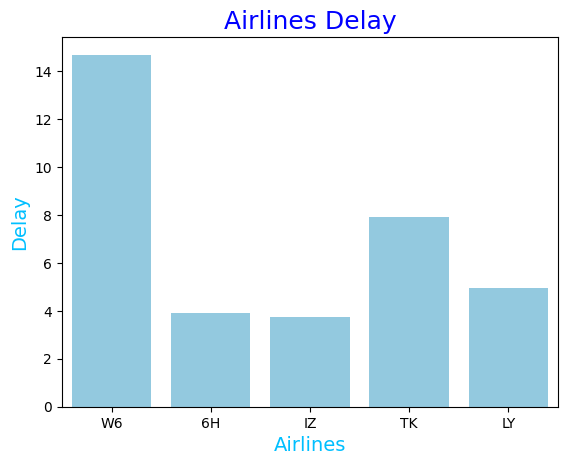

In [26]:
##definde which 5 companys have the most delays
top5_airlines = df.groupby('CHOPER',as_index = False )['DELAY'].count().sort_values(by = 'DELAY' ,ascending = False).head(5)

airline_delay = df[df['CHOPER'].isin(top5_airlines['CHOPER'])]
plt.title('Airlines Delay' , fontdict={'fontsize':18 , 'color': 'blue'})
sb.barplot(data = airline_delay , x = 'CHOPER' , y = 'DELAY' , errorbar=('ci', 0) ,color='SkyBlue' )
plt.xlabel('Airlines', fontdict={'fontsize':14 , 'color': 'DeepSkyBlue'})
plt.ylabel('Delay', fontdict={'fontsize':14 , 'color': 'DeepSkyBlue'})
plt.show()

Terminal

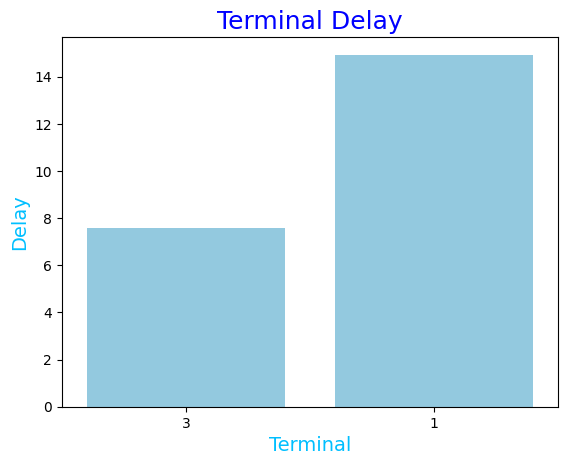

In [27]:
terminal = df[['CHTERM' , 'DELAY']]

plt.title('Terminal Delay',fontdict={'fontsize':18 , 'color': 'Blue'})
sb.barplot(data = terminal , x = 'CHTERM' ,   y = 'DELAY' , errorbar=('ci', 0), color='SkyBlue' )
plt.xlabel('Terminal', fontdict={'fontsize':14 , 'color': 'DeepSkyBlue'})
plt.ylabel('Delay', fontdict={'fontsize':14 , 'color': 'DeepSkyBlue'})
plt.show()

Day of the week 

C:\Users\bugs bunny\AppData\Local\Temp\ipykernel_7728\2483010100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_delay['DAY'] = day_delay['CHSTOL'].dt.day_name()


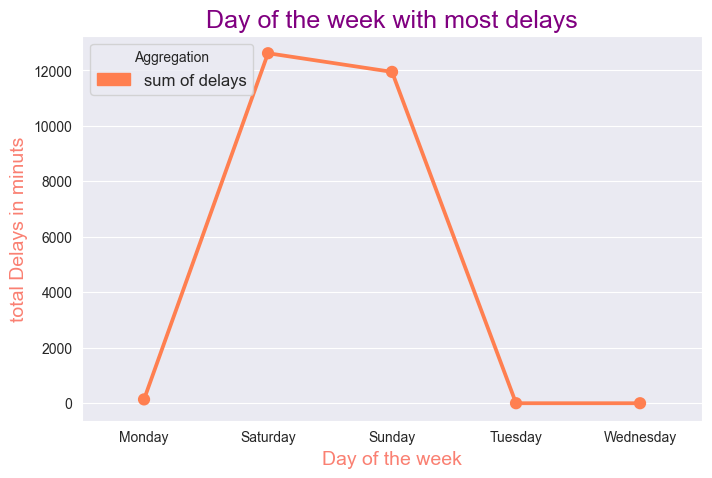

In [28]:
day_delay = df[['CHSTOL','DELAY']]
day_delay['DAY'] = day_delay['CHSTOL'].dt.day_name()
day_delay_sum = day_delay.groupby('DAY')['DELAY'].sum()


plt.figure(figsize=(8,5))
sb.set_style('darkgrid')
plt.title('Day of the week with most delays',fontdict={'fontsize':18 , 'color': 'purple'})
sb.pointplot( x=day_delay_sum.index , y=day_delay_sum ,color='coral')
plt.xlabel('Day of the week', fontdict={'fontsize':14 , 'color': 'salmon'})
plt.ylabel('total Delays in minuts', fontdict={'fontsize':14 , 'color': 'salmon'})
pop_sum = mpat.Patch(label='sum of delays' , color = 'coral')
plt.legend(handles=[pop_sum] , title = 'Aggregation' , fontsize = 12 ,loc='upper left' )
plt.show()

create 3 diffrent visualizations with your analyzation

## What is the top 10 destinations ?

based od departures only

In [29]:
dep = df[df['CHRMINE'] == 'DEPARTED']
arr = df[df['CHRMINE'] == 'LANDED']

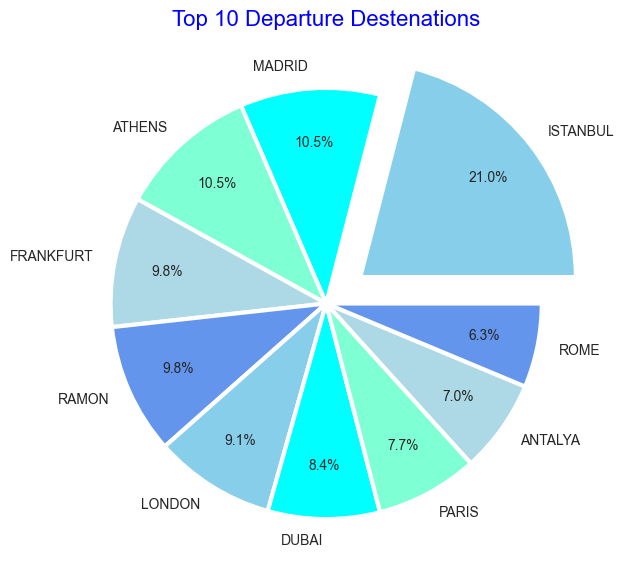

In [30]:
des = dep.groupby('CHLOC1T')['CHFLTN'].count().sort_values(ascending=False)
top10des = des.head(10)

plt.figure(figsize=(7,7))
colorplt = ['#87CEEB' , '#00FFFF' , '#7FFFD4' , '#ADD8E6' , '#6495ED']
plt.pie(data=top10des , x=top10des.values , labels=top10des.index , autopct='%.1f%%' , colors=colorplt , 
         explode=(0.2,0,0,0,0,0,0,0,0,0),wedgeprops = {'linewidth': 3},pctdistance=0.75)
plt.title('Top 10 Departure Destenations',fontdict={'fontsize':16 , 'color': 'Blue'})
plt.show()

In [31]:
#in this diagram the percentage is not accurate , because the other destinations are not taken in conclusion.

C:\Users\bugs bunny\AppData\Local\Temp\ipykernel_7728\645773485.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pesdes = top10des.append(elsdest)


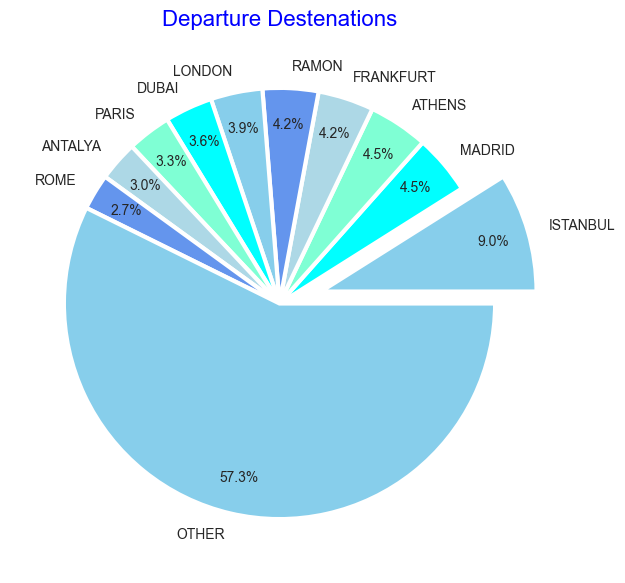

In [32]:
els= dep.groupby('CHLOC1T')['CHFLTN'].count().sort_values(ascending=False).tail(len(des)-10)
elsdest = pd.Series(els.sum() , index=['OTHER'])
pesdes = top10des.append(elsdest)

plt.figure(figsize=(7,7))
plt.pie(data=pesdes , x=pesdes.values , labels=pesdes.index , autopct='%.1f%%' , colors=colorplt , 
         explode=(0.2,0,0,0,0,0,0,0,0,0,0),wedgeprops = {'linewidth': 3}, pctdistance=0.83)
plt.title('Departure Destenations',fontdict={'fontsize':16 , 'color': 'Blue'})
plt.show()

## What is the busiest time in the airport

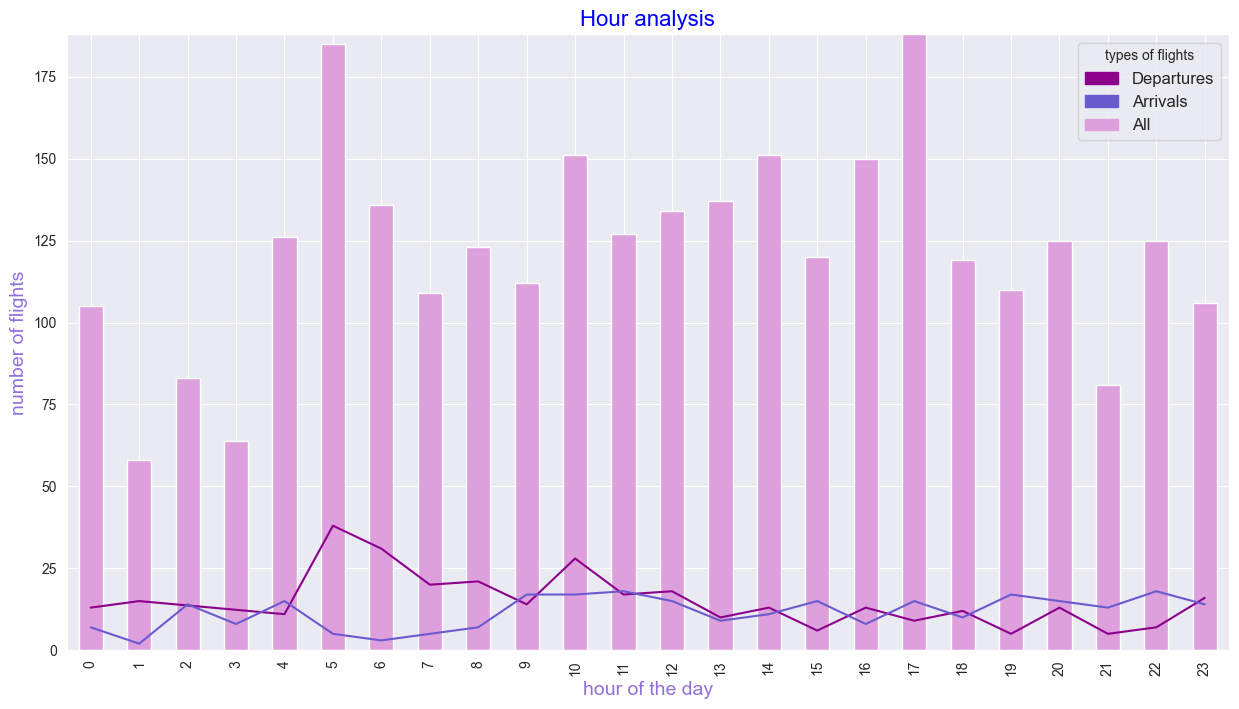

In [33]:
rushhourdep = dep[['CHFLTN','CHSTOL']]
rushhourarr = arr[['CHFLTN','CHSTOL']]
rushhour = df[['CHFLTN','CHSTOL','CHRMINE']]
def hr_func(ts):
    return ts.hour
hh=rushhourdep['CHSTOL'].apply(hr_func)
rushhourdep.insert(column ='HOUR' , value=hh , loc=2)
hh=rushhourarr['CHSTOL'].apply(hr_func)
rushhourarr.insert(column ='HOUR' , value=hh , loc=2)
hh=rushhour['CHSTOL'].apply(hr_func)
rushhour.insert(column ='HOUR' , value=hh , loc=2)

countdep= rushhourdep.groupby('HOUR')['CHFLTN'].count()
countarr= rushhourarr.groupby('HOUR')['CHFLTN'].count()
count= rushhour.groupby('HOUR')['CHFLTN'].count()

plt.figure(figsize=(15,8))
plt.title('Hour analysis',fontdict={'fontsize':16 , 'color': 'Blue'})
countdep.plot.line(color='#8B008B')
countarr.plot.line(color='#6A5ACD')
count.plot.bar(color='#DDA0DD')
plt.xticks(count.index)
plt.margins(x=0,y=0)
plt.xlabel('hour of the day' ,fontdict={'fontsize':14 , 'color': '#9370DB'} )
plt.ylabel('number of flights',fontdict={'fontsize':14 , 'color': '#9370DB'} )
pop_dep = mpat.Patch(label='Departures' , color = '#8B008B')
pop_arr = mpat.Patch(label='Arrivals' , color= '#6A5ACD')
pop_all = mpat.Patch(label='All' , color='#DDA0DD')
plt.legend(handles=[pop_dep,pop_arr,pop_all] , title = 'types of flights' , fontsize = 12 ,loc='upper right' )
plt.show()

## what is the busiest day of the week in the airport

C:\Users\bugs bunny\AppData\Local\Temp\ipykernel_7728\834871310.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sb.histplot(data=busiday , x='DAY',hue='Terminal' , multiple='dodge' ,palette=colorplt)


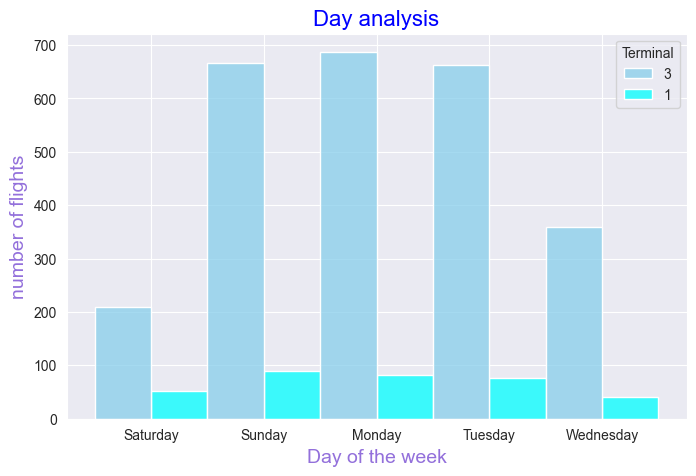

In [34]:
busiday = df.loc[:,('CHFLTN','CHSTOL','CHTERM')]
busiday['DAY'] = busiday['CHSTOL'].dt.day_name()
busiday['Terminal'] = busiday['CHTERM']

plt.figure(figsize=(8,5))
plt.title('Day analysis',fontdict={'fontsize':16 , 'color': 'Blue'})
sb.histplot(data=busiday , x='DAY',hue='Terminal' , multiple='dodge' ,palette=colorplt)
plt.xlabel('Day of the week' ,fontdict={'fontsize':14 , 'color': '#9370DB'} )
plt.ylabel('number of flights',fontdict={'fontsize':14 , 'color': '#9370DB'} )
plt.show()